In [ ]:
%pip install qiskit qiskit-ibm-runtime

In [ ]:
%pip install qiskit

In [ ]:
pip install qiskit[visualization]

In [ ]:
%pip install qiskit-aer

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, QuantumRegister
from math import pi

from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector, DensityMatrix

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import state_fidelity
from qiskit_aer import Aer

In [ ]:
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)


In [ ]:
def create_bell_pair(qc, a, b):

    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target


In [ ]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)


In [ ]:
def measure_and_send(qc, a, b):

    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)


In [ ]:


def bob_gates(qc, qubit, crz, crx):

    # Nuova sintassi per porte condizionali

    with qc.if_test((crx, 1)):

        qc.x(qubit)

    with qc.if_test((crz, 1)):

        qc.z(qubit)




<IPython.core.display.Latex object>

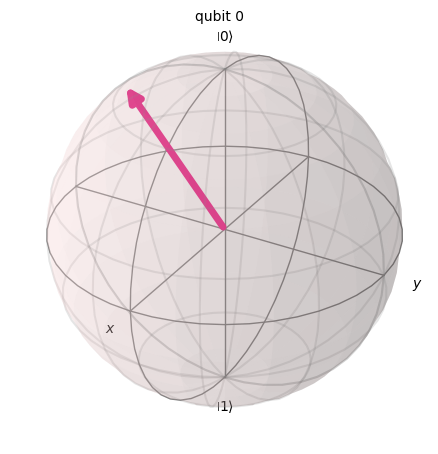

In [ ]:

from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
psi = random_statevector(2)


display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

plot_bloch_multivector(psi)
sim = Aer.get_backend('aer_simulator')


<IPython.core.display.Latex object>

Statevector([-0.38370686+0.83135749j,  0.38807106+0.10495061j,
             -0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


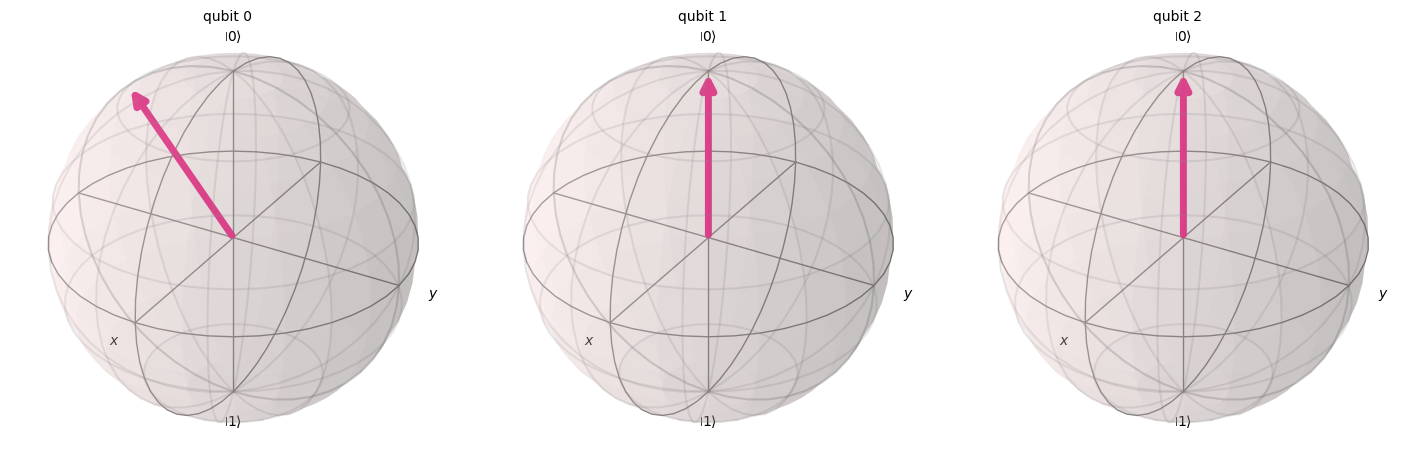

In [ ]:

qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)
sim = Aer.get_backend('aer_simulator')

## STEP 0
qc.initialize(psi, 0)
qc.barrier()
qc.save_statevector()
job = sim.run(qc)
result = job.result()
state_step0 = result.get_statevector()
display(array_to_latex(state_step0, prefix="|\\psi\\rangle ="))
print(state_step0)
plot_bloch_multivector(state_step0)
#plot_bloch_multivector(psi)



Statevector([-0.38370686+0.83135749j,  0.38807106+0.10495061j,
             -0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


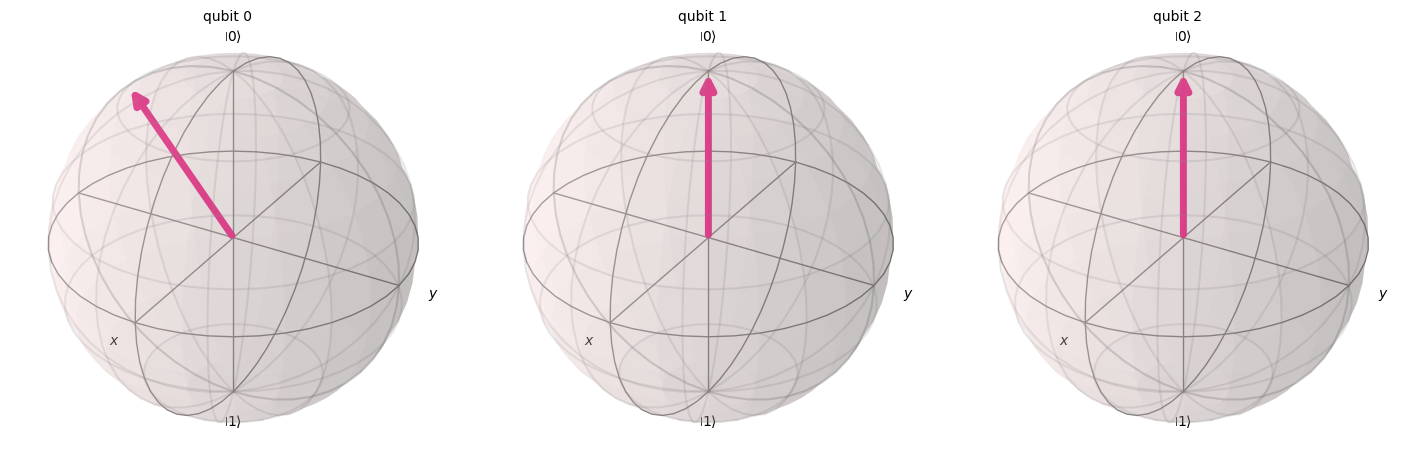

In [ ]:

qc_step0 = QuantumCircuit(qr, crz, crx)
qc_step0.initialize(psi, 0)
qc_step0.save_statevector()
job = sim.run(qc_step0)
result = job.result()
state_step0 = result.get_statevector()
print(state_step0)
plot_bloch_multivector(state_step0)



Statevector([-0.27132172+0.58785852j,  0.27440768+0.07421129j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.27132172+0.58785852j,  0.27440768+0.07421129j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

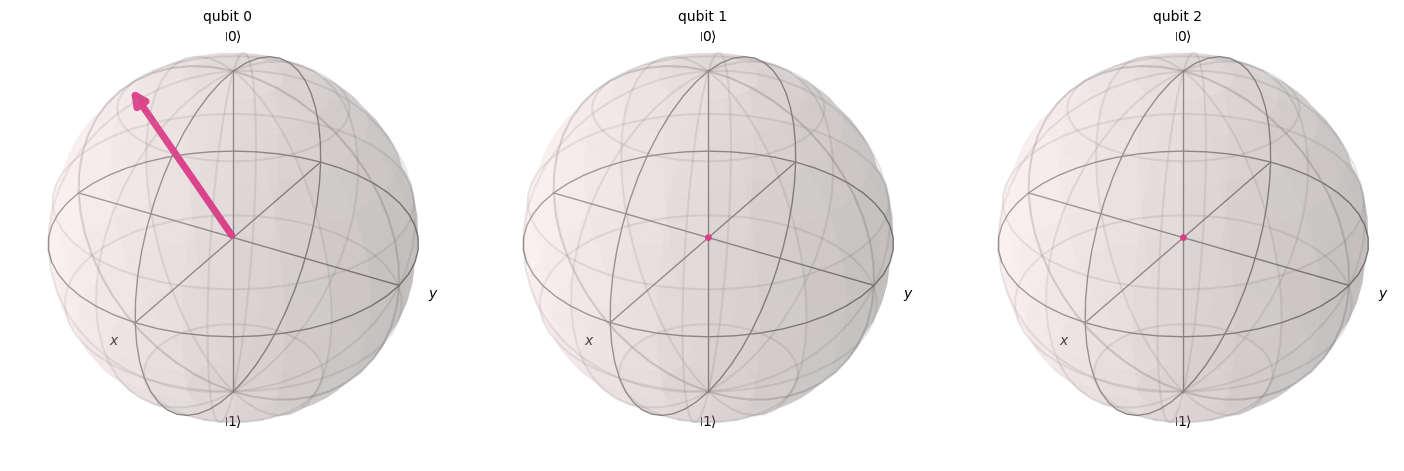

In [ ]:
qc_step1 = QuantumCircuit(qr, crz, crx)
qc_step1.initialize(psi, 0)
qc_step1.barrier()
create_bell_pair(qc_step1, 1, 2)
qc_step1.barrier()
qc_step1.save_statevector()
job = sim.run(qc_step1)
result = job.result()
state_step1 = result.get_statevector()
print(state_step1)
display(array_to_latex(state_step1, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(state_step1)


Statevector([-0.19185343+0.41567874j, -0.19185343+0.41567874j,
              0.19403553+0.0524753j , -0.19403553-0.0524753j ,
              0.19403553+0.0524753j , -0.19403553-0.0524753j ,
             -0.19185343+0.41567874j, -0.19185343+0.41567874j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

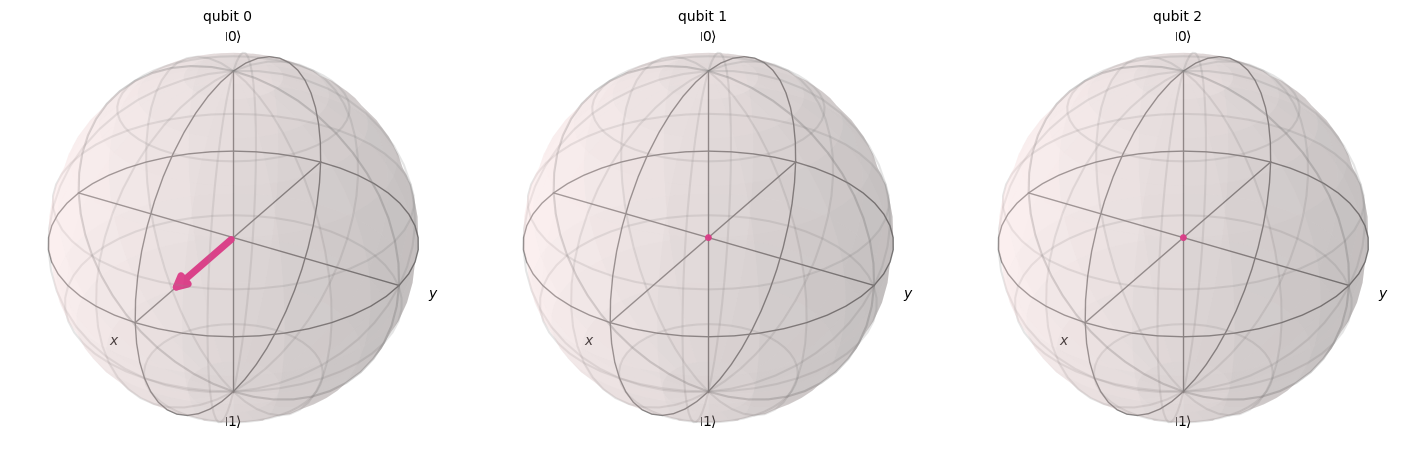

In [ ]:
qc_step2 = QuantumCircuit(qr, crz, crx)
qc_step2.initialize(psi, 0)
qc_step2.barrier()
create_bell_pair(qc_step2, 1, 2)
qc_step2.barrier()
alice_gates(qc_step2, 0, 1)
qc_step2.save_statevector()
job = sim.run(qc_step2)
result = job.result()
state_step2 = result.get_statevector()
print(state_step2)
display(array_to_latex(state_step2, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(state_step2)


Statevector([-0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        , -0.38807106-0.10495061j,
              0.        +0.j        ,  0.        -0.j        ,
             -0.        +0.j        , -0.38370686+0.83135749j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

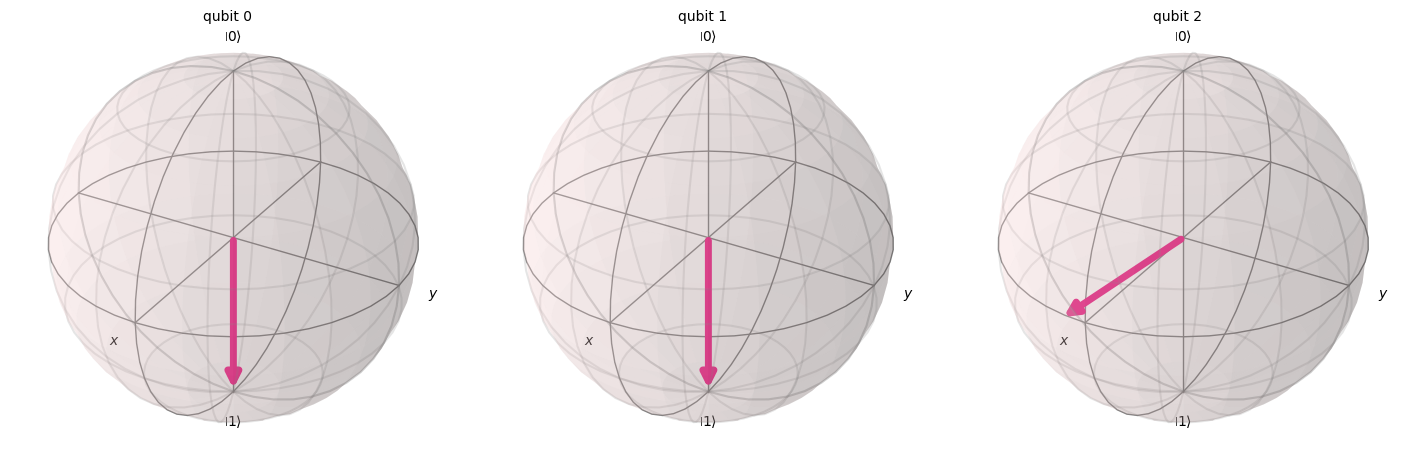

In [ ]:
qc_step3 = QuantumCircuit(qr, crz, crx)
qc_step3.initialize(psi, 0)
qc_step3.barrier()
create_bell_pair(qc_step3, 1, 2)
qc_step3.barrier()
alice_gates(qc_step3, 0, 1)
qc_step3.barrier()
measure_and_send(qc_step3, 0, 1)
qc_step3.save_statevector()
job = sim.run(qc_step3)
result = job.result()
state_step3 = result.get_statevector()
print(state_step3)
display(array_to_latex(state_step3, prefix="|\\psi3\\rangle ="))
display(array_to_latex(state_step0, prefix="|\\psi0\\rangle ="))
plot_bloch_multivector(state_step0)
plot_bloch_multivector(state_step3)

Measurement outcomes and frequencies:
  000 0 0: 239 times (23.3%)
  001 0 1: 211 times (20.6%)
  010 1 0: 37 times (3.6%)
  011 1 1: 30 times (2.9%)
  100 0 0: 37 times (3.6%)
  101 0 1: 41 times (4.0%)
  110 1 0: 221 times (21.6%)
  111 1 1: 208 times (20.3%)


Statevector([ 0.        +0.j        ,  0.        -0.j        ,
             -0.        +0.j        , -0.38370686+0.83135749j,
              0.        -0.j        ,  0.        -0.j        ,
             -0.        +0.j        ,  0.38807106+0.10495061j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

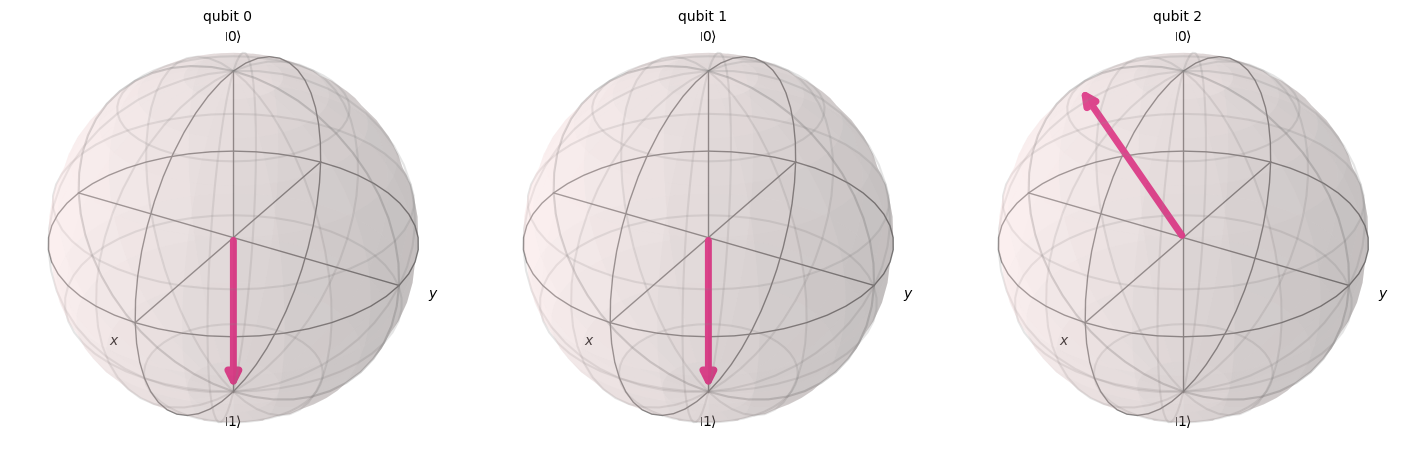

In [ ]:
qc_step4 = QuantumCircuit(qr, crz, crx)
qc_step4.initialize(psi, 0)
qc_step4.barrier()
create_bell_pair(qc_step4, 1, 2)
qc_step4.barrier()
alice_gates(qc_step4, 0, 1)
qc_step4.barrier()
measure_and_send(qc_step4, 0, 1)
qc_step4.barrier()
bob_gates(qc_step4, 2, crz, crx)
qc_step4.save_statevector()
job = sim.run(qc_step4)
result = job.result()
state_step4 = result.get_statevector()
print(state_step4)
display(array_to_latex(state_step0, prefix="|\\psi0\\rangle ="))
display(array_to_latex(state_step4, prefix="|\\psi4\\rangle ="))
plot_bloch_multivector(state_step4)


In [ ]:
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace

F = state_fidelity(state_step0, state_step4)
print(F)
rho_A0 = partial_trace(state_step0, [1, 2])
rho_B0 = partial_trace(state_step4, [0, 1])
F = state_fidelity(rho_A0, rho_B0)
print(F)

0.0
1.0000000000000004
